<a href="https://colab.research.google.com/github/Saicharan1818/theta/blob/main/Cars_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
file_name = '/content/Car_Data.csv'
cars = pd.read_csv(file_name)

In [ ]:
cars

,Name,Company,City,Year,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,On_Road_Price
0,SKODARAPID,SKODA,Kolkata,2011,91907,2,Petrol,1.019998e+05,4.684187e+05
1,HYUNDAII10,HYUNDAI,Bangalore,2022,29132,2,Petrol,3.619998e+05,3.632444e+05
2,HYUNDAIXCENT,HYUNDAI,Indore,2022,64670,1,Diesel,5.070001e+05,4.650708e+05
3,MARUTIALTO K10,MARUTI,Kochi,2016,65754,1,Petrol,5.199997e+05,2.249231e+05
4,HYUNDAINEW SANTRO,HYUNDAI,Ahmedabad,2023,12548,1,Petrol,3.669998e+05,5.774048e+05
...,...,...,...,...,...,...,...,...,...
100236,MARUTIALTO 800,MARUTI,Bangalore,2014,33905,1,Petrol,1.040000e+06,3.174234e+05
100237,MARUTIEECO,MARUTI,Ahmedabad,2022,8147,1,Petrol,4.740002e+05,5.288146e+05
100238,TATAHARRIER,TATA,Chennai,2021,3507,1,Diesel,3.669996e+05,1.821036e+06
100239,MARUTIWAGON R 1.0,MARUTI,Ghaziabad,2024,62153,1,Petrol,1.400000e+05,2.921990e+05


In [ ]:
df=pd.DataFrame(cars)
df

,Name,Company,City,Year,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,On_Road_Price
0,SKODARAPID,SKODA,Kolkata,2011,91907,2,Petrol,1.019998e+05,4.684187e+05
1,HYUNDAII10,HYUNDAI,Bangalore,2022,29132,2,Petrol,3.619998e+05,3.632444e+05
2,HYUNDAIXCENT,HYUNDAI,Indore,2022,64670,1,Diesel,5.070001e+05,4.650708e+05
3,MARUTIALTO K10,MARUTI,Kochi,2016,65754,1,Petrol,5.199997e+05,2.249231e+05
4,HYUNDAINEW SANTRO,HYUNDAI,Ahmedabad,2023,12548,1,Petrol,3.669998e+05,5.774048e+05
...,...,...,...,...,...,...,...,...,...
100236,MARUTIALTO 800,MARUTI,Bangalore,2014,33905,1,Petrol,1.040000e+06,3.174234e+05
100237,MARUTIEECO,MARUTI,Ahmedabad,2022,8147,1,Petrol,4.740002e+05,5.288146e+05
100238,TATAHARRIER,TATA,Chennai,2021,3507,1,Diesel,3.669996e+05,1.821036e+06
100239,MARUTIWAGON R 1.0,MARUTI,Ghaziabad,2024,62153,1,Petrol,1.400000e+05,2.921990e+05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100241 entries, 0 to 100240
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Name              100241 non-null  object 
 1   Company           100241 non-null  object 
 2   City              100241 non-null  object 
 3   Year              100241 non-null  int64  
 4   KM_Driven         100241 non-null  int64  
 5   No._of_Owners     100241 non-null  int64  
 6   Fuel_Type         100241 non-null  object 
 7   Calculated_Score  100241 non-null  float64
 8   On_Road_Price     100241 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [ ]:
df.isnull().sum()

,0
Name,0
Company,0
City,0
Year,0
KM_Driven,0
No._of_Owners,0
Fuel_Type,0
Calculated_Score,0
On_Road_Price,0


In [ ]:
df.describe()

,Year,KM_Driven,No._of_Owners,Calculated_Score,On_Road_Price
count,100241.000000,100241.000000,100241.000000,1.002410e+05,1.002410e+05
mean,2017.021558,40986.343831,1.247613,4.287180e+05,6.740863e+05
std,4.325635,25932.485189,0.466056,2.219730e+05,3.290666e+05
min,2010.000000,-433.000000,1.000000,4.146138e+02,1.302712e+05
25%,2013.000000,19812.000000,1.000000,1.810004e+05,4.428043e+05
50%,2017.000000,37622.000000,1.000000,4.680002e+05,5.890499e+05
75%,2021.000000,58714.000000,1.000000,5.070003e+05,8.223632e+05
max,2024.000000,456081.000000,4.000000,1.698000e+06,2.317803e+06


In [ ]:
#converting string in to numeric
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder from sklearn.preprocessing
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df['Company']=le.fit_transform(df['Company'])
df['City']=le.fit_transform(df['City'])
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df

,Name,Company,City,Year,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,On_Road_Price
0,57,11,9,2011,91907,2,1,1.019998e+05,4.684187e+05
1,15,3,1,2022,29132,2,1,3.619998e+05,3.632444e+05
2,22,3,6,2022,64670,1,0,5.070001e+05,4.650708e+05
3,34,7,8,2016,65754,1,1,5.199997e+05,2.249231e+05
4,19,3,0,2023,12548,1,1,3.669998e+05,5.774048e+05
...,...,...,...,...,...,...,...,...,...
100236,33,7,1,2014,33905,1,1,1.040000e+06,3.174234e+05
100237,39,7,0,2022,8147,1,1,4.740002e+05,5.288146e+05
100238,59,12,2,2021,3507,1,0,3.669996e+05,1.821036e+06
100239,49,7,3,2024,62153,1,1,1.400000e+05,2.921990e+05


In [ ]:
#initialize standardScaler
sc=StandardScaler()
scaled_features = sc.fit_transform(df)
df_scaled=pd.DataFrame(scaled_features,columns=df.columns)
df_scaled

,Name,Company,City,Year,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,On_Road_Price
0,1.371688,1.611197,0.529757,-1.392070,1.963595,1.614376,0.221135,-1.471890,-0.625006
1,-0.878170,-0.905567,-1.165402,1.150922,-0.457126,1.614376,0.221135,-0.300570,-0.944622
2,-0.503194,-0.905567,-0.105927,1.150922,0.913286,-0.531297,-2.104381,0.352667,-0.635180
3,0.139623,0.352815,0.317862,-0.236165,0.955087,-0.531297,0.221135,0.411231,-1.364968
4,-0.663898,-0.905567,-1.377297,1.382103,-1.096636,-0.531297,0.221135,-0.278045,-0.293807
...,...,...,...,...,...,...,...,...,...
100236,0.086055,0.352815,-1.165402,-0.698527,-0.273070,-0.531297,0.221135,2.753869,-1.083868
100237,0.407463,0.352815,-1.377297,1.150922,-1.266346,-0.531297,0.221135,0.204000,-0.441468
100238,1.478824,1.925793,-0.953507,0.919741,-1.445273,-0.531297,-2.104381,-0.278046,3.485482
100239,0.943143,0.352815,-0.741612,1.613284,0.816226,-0.531297,0.221135,-1.300696,-1.160523


In [ ]:
#correlation
correlation_matrix=df_scaled.corr()
correlation_matrix['On_Road_Price'].sort_values(ascending=False)

,On_Road_Price
On_Road_Price,1.000000
Calculated_Score,0.463655
Company,0.028193
Year,0.000727
Name,-0.004994
City,-0.035426
No._of_Owners,-0.148489
KM_Driven,-0.203864
Fuel_Type,-0.369207


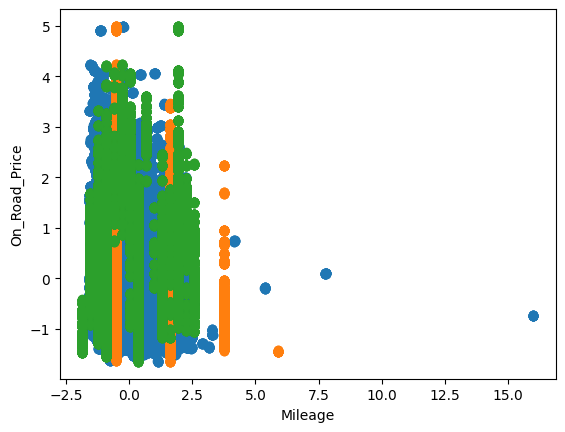

In [ ]:
#scatter plot
plt.scatter(df_scaled['KM_Driven'],df_scaled['On_Road_Price'])
plt.scatter(df_scaled['No._of_Owners'],df_scaled['On_Road_Price'])
plt.scatter(df_scaled['Company'],df_scaled['On_Road_Price'])
plt.xlabel('Mileage')
plt.ylabel('On_Road_Price')
plt.show()

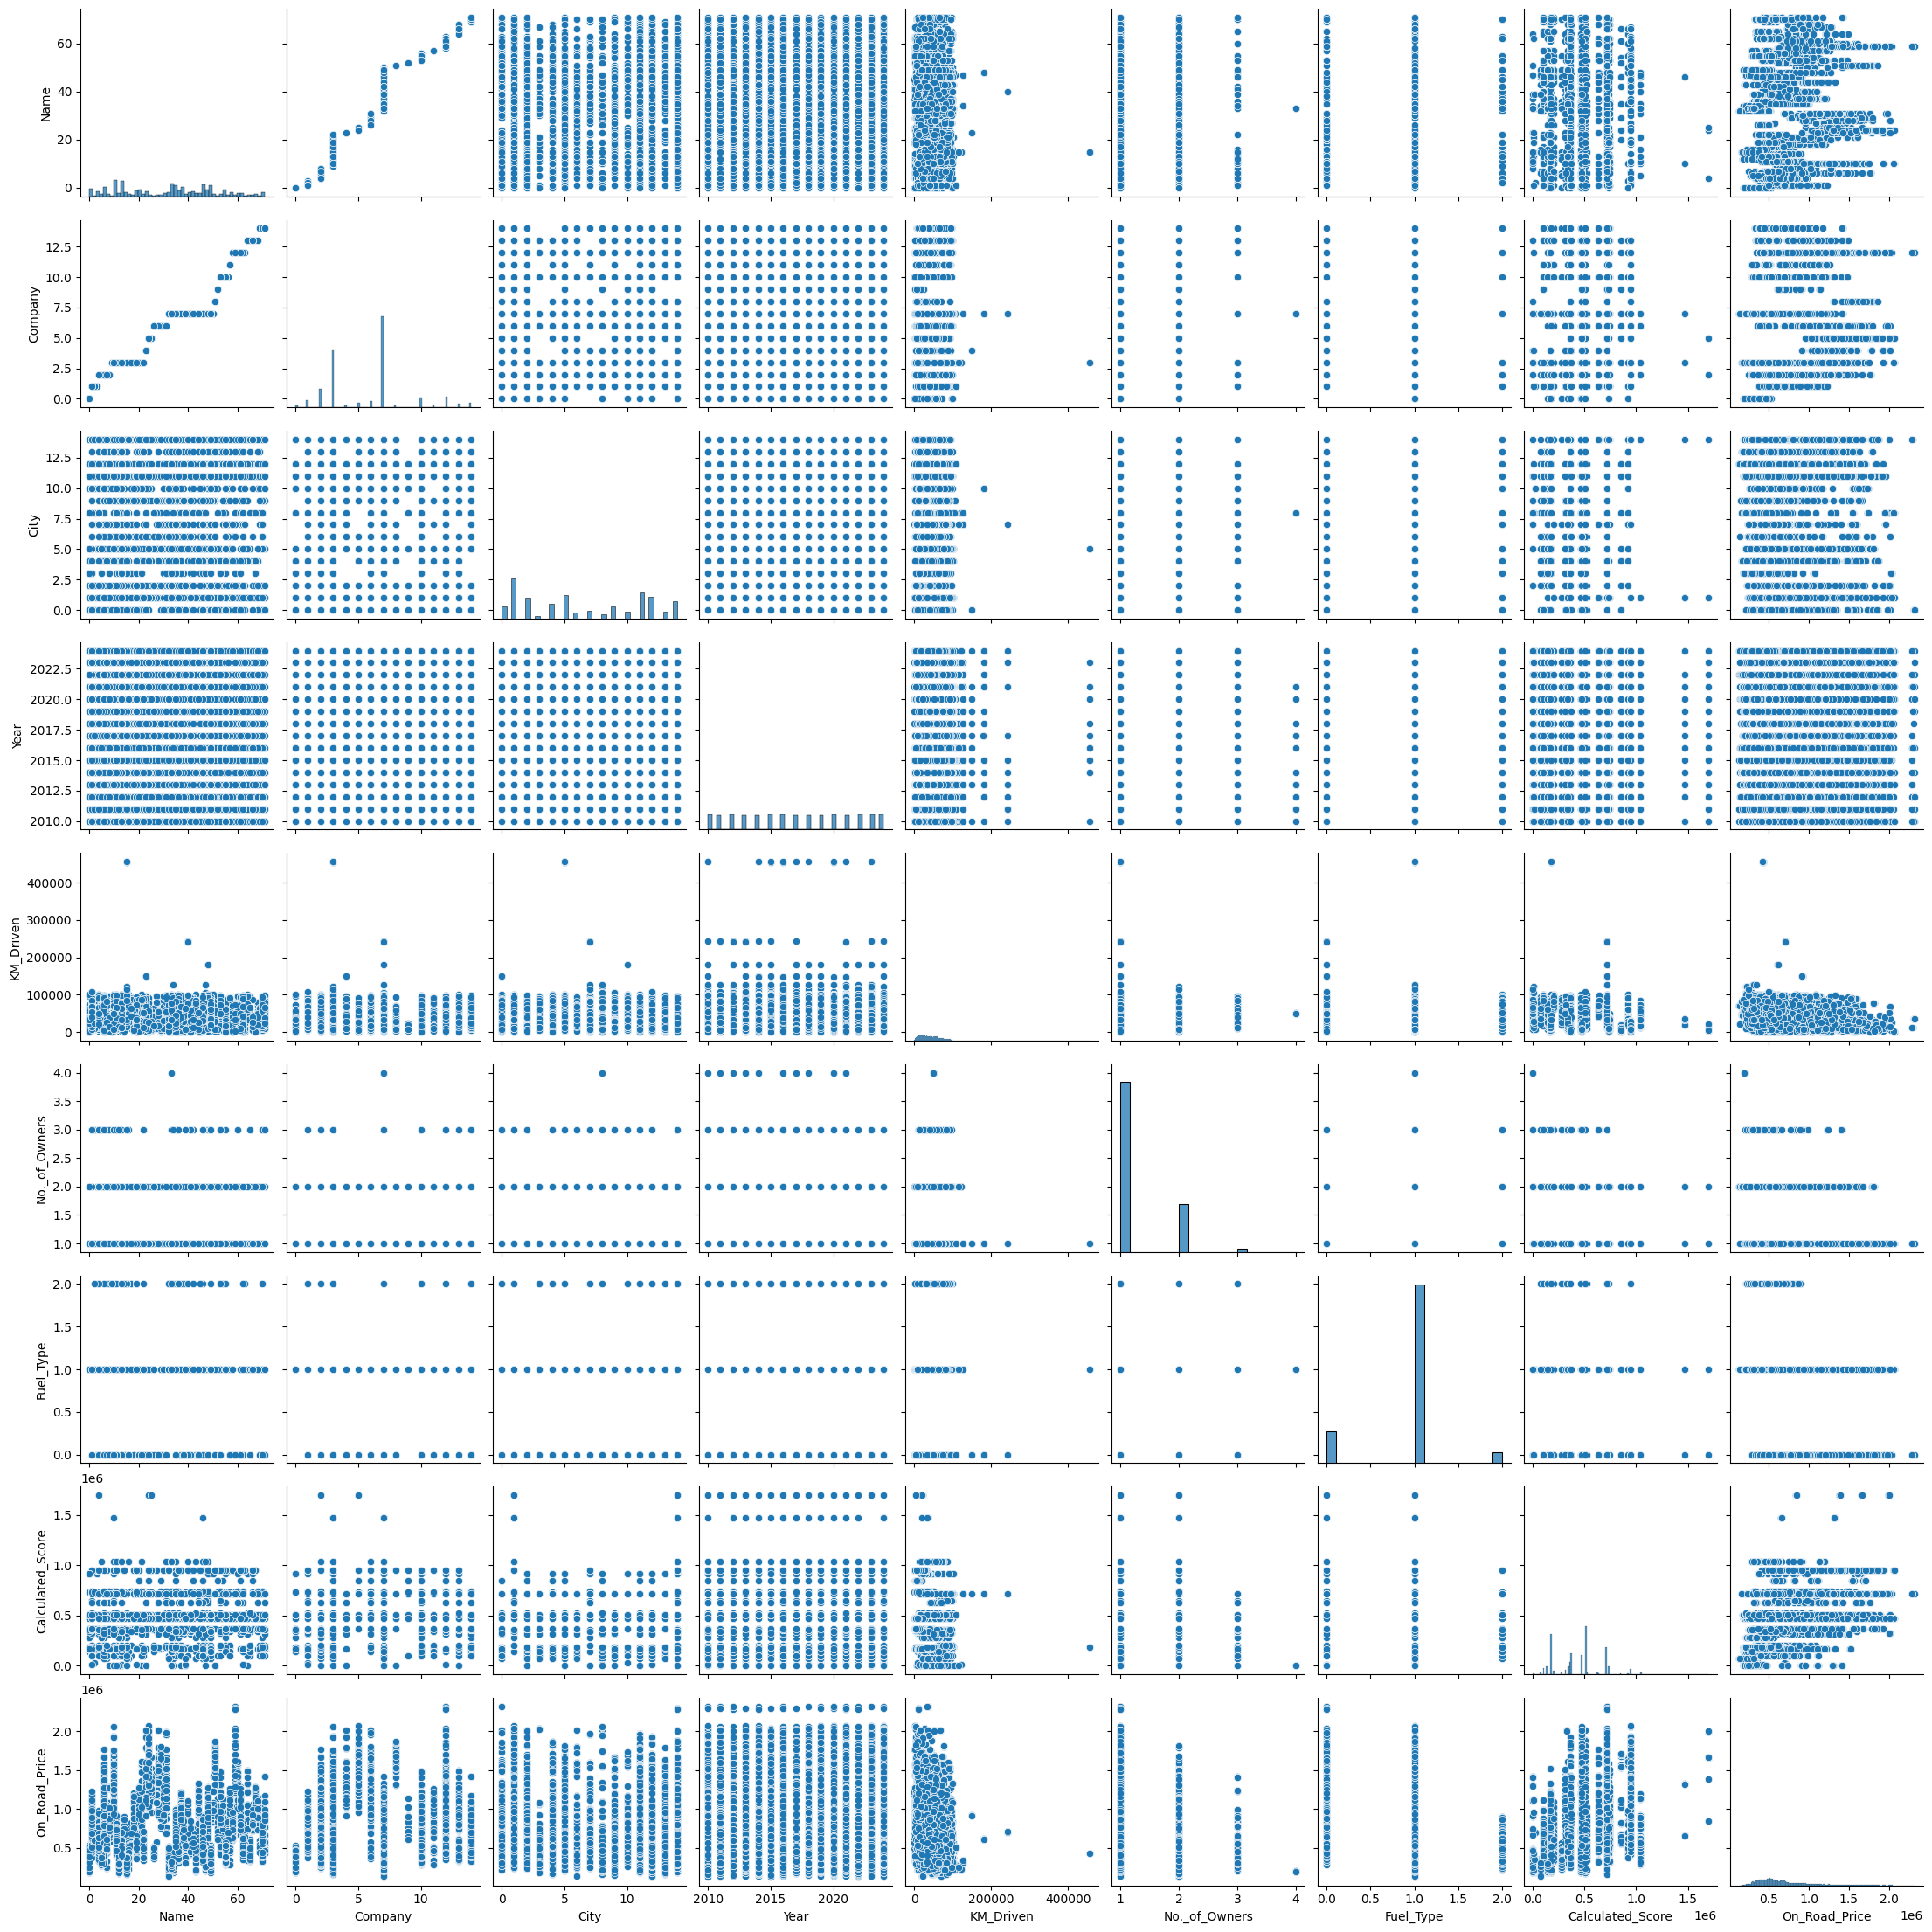

In [ ]:
sns.pairplot(df)

<Axes: >

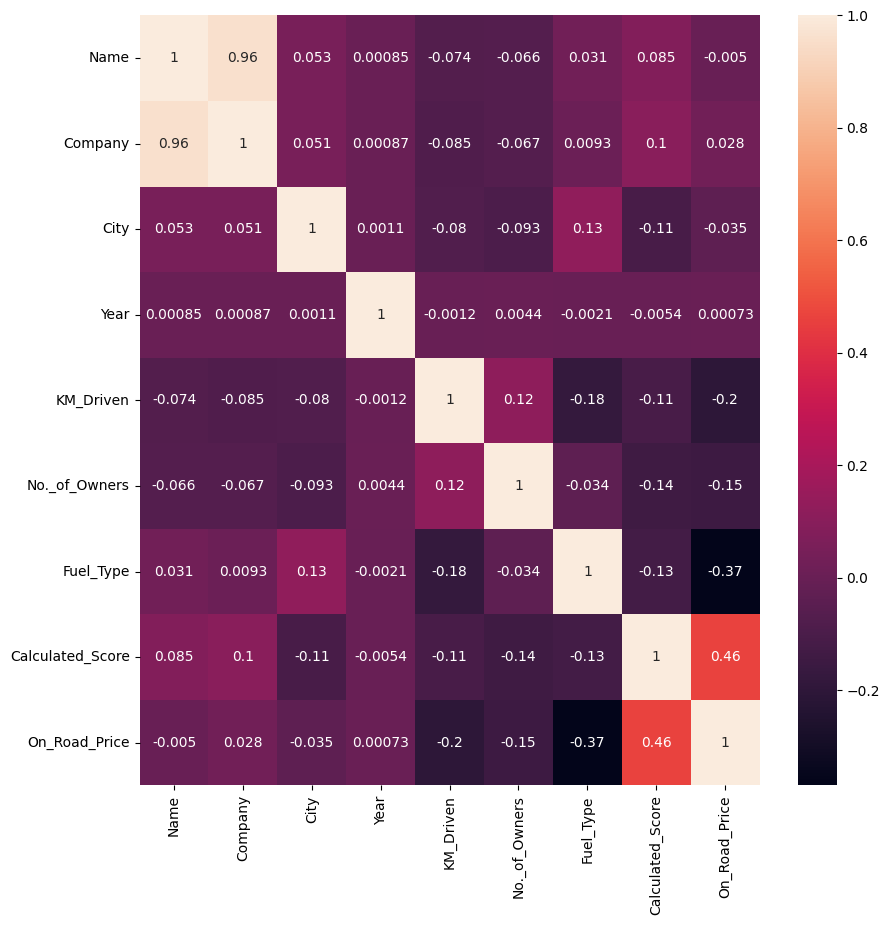

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True)